In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

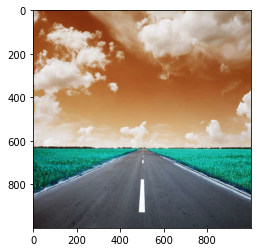

In [ ]:
image_c= cv2.imread("/content/road_124163875_1000.jpg")
plt.imshow(image_c)

(1000, 1000)

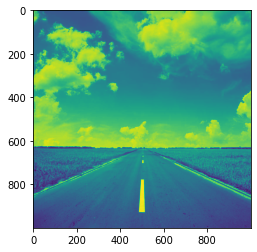

In [ ]:
image_g = cv2.cvtColor(image_c, cv2.COLOR_RGB2GRAY)
plt.imshow(image_g)
image_g.shape

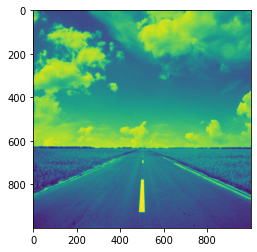

In [ ]:
image_blur = cv2.GaussianBlur(image_g, (7,7), 0)
plt.imshow(image_blur)

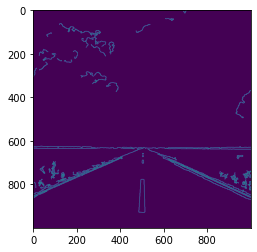

In [ ]:
threshhold_low = 10
threshhold_high = 200

image_canny = cv2.Canny(image_blur, threshhold_low, threshhold_high)
plt.imshow(image_canny)

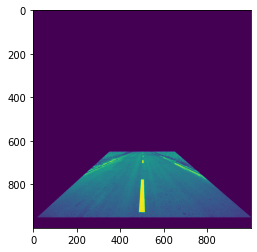

In [ ]:
vertices = np.array([(20,950),(350,650),(650,650),(1000,950)])
mask = np.zeros_like(image_g)
cv2.fillPoly(mask, np.int32([vertices]), 255)
masked_image = cv2.bitwise_and(image_g, mask)
plt.imshow(masked_image)

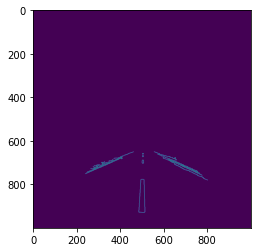

In [ ]:
masked_image = cv2.bitwise_and(image_canny, mask)
plt.figure()
plt.imshow(masked_image)

In [ ]:
rho = 2
theta = np.pi/180
threshold = 40
min_line_len = 100
max_line_gap = 50
lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength = min_line_len, maxLineGap = max_line_gap)

line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype = np.uint8)

for line in lines:
  for x1,y1,x2,y2 in line:
    cv2.line(line_image, (x1,y1), (x2,y2), [255, 0, 255], 35)
lines

array([[[485, 919, 494, 779]],

       [[573, 660, 765, 749]],

       [[239, 751, 448, 654]],

       [[632, 685, 754, 739]],

       [[648, 706, 780, 768]],

       [[249, 747, 404, 678]],

       [[598, 675, 773, 756]],

       [[274, 728, 385, 679]],

       [[249, 742, 409, 681]],

       [[264, 728, 365, 687]],

       [[556, 650, 760, 746]],

       [[571, 660, 696, 732]],

       [[290, 712, 401, 678]],

       [[359, 699, 461, 650]],

       [[276, 728, 386, 679]],

       [[278, 720, 407, 678]]], dtype=int32)

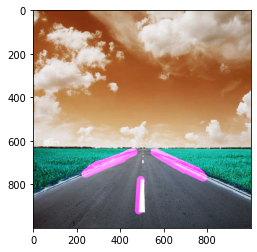

In [ ]:
a = 1
b = 1
c = 1

image = cv2.addWeighted(image_c, a, line_image, b, c)
plt.figure()
plt.imshow(image)